In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

In [37]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [38]:
# Flatten the images into vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [50]:
# Define the structure of the layers
layers = [15, 8, 8 , 9,10]  # The structure of our DNN

In [51]:
# Define a function to create a DNN model with a given activation function
def create_model(activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(784,), activation=activation))
    for units in layers[1:]:
        model.add(Dense(units, activation=activation if units != layers[-1] else 'softmax'))
    return model

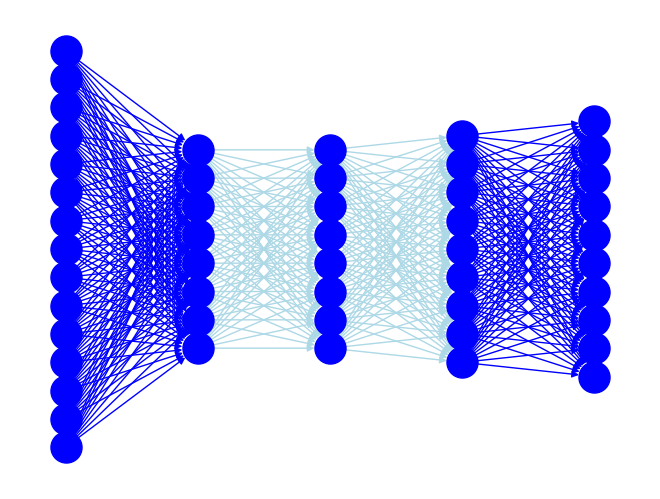

In [52]:
# Function to draw the network
def draw_network(layers):
    G = nx.DiGraph()
    max_layer_size = max(layers)
    for i in range(len(layers)):
        for j in range(layers[i]):
            # Adjust the y-position to center nodes
            adjusted_j = (max_layer_size - layers[i]) / 2 + j
            G.add_node((i, adjusted_j))
            if i > 0:
                for k in range(layers[i-1]):
                    # Adjust the y-position to center nodes
                    adjusted_k = (max_layer_size - layers[i-1]) / 2 + k
                    # Change the color of the connections within the last layer
                    if i>= 2 and i != len(layers) - 1:
                        G.add_edge((i-1, adjusted_k), (i, adjusted_j), color='lightblue')
                    else:
                        G.add_edge((i-1, adjusted_k), (i, adjusted_j), color='blue')

    pos = {(i, j): (i, -j) for i,j in G.nodes()}
    edge_colors = [G[u][v]['color'] for u,v in G.edges()]
    nx.draw(G, pos, with_labels=False, node_color='blue', node_size=500, edge_color=edge_colors)

# Draw the network
draw_network(layers)
plt.show()

sigmoid Training Loss: 0.2147490233182907
sigmoid Training Accuracy: 0.9440333247184753
sigmoid Validation Loss: 0.23177771270275116
sigmoid Validation Accuracy: 0.9404000043869019
tanh Training Loss: 0.10884328931570053
tanh Training Accuracy: 0.9670500159263611
tanh Validation Loss: 0.1338716745376587
tanh Validation Accuracy: 0.9599000215530396
relu Training Loss: 0.1192893385887146
relu Training Accuracy: 0.9624833464622498
relu Validation Loss: 0.15256474912166595
relu Validation Accuracy: 0.9578999876976013


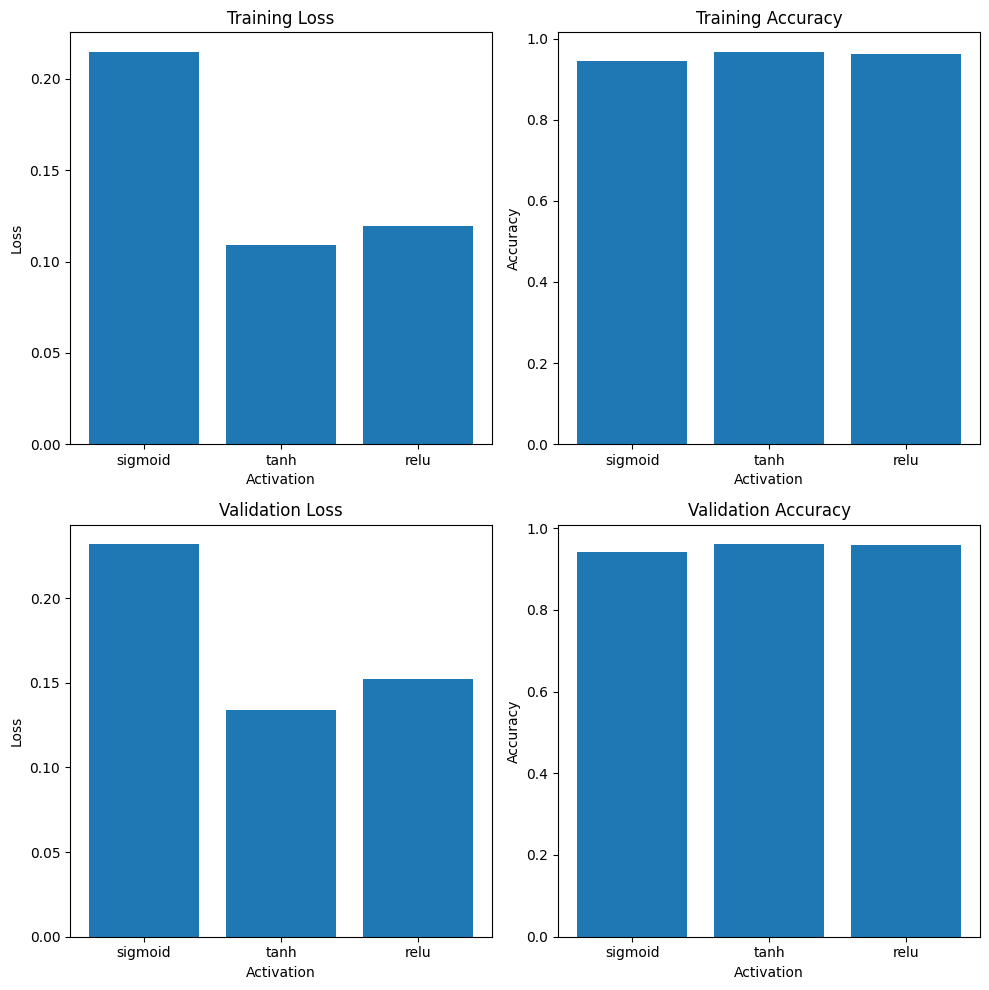

In [42]:
# Define the basic activation functions
basic_activations = ['sigmoid', 'tanh', 'relu']

# Train a model for each basic activation function and print the test accuracy
basic_history_dict = {}
final_results = {"Activation": [], "Training Loss": [], "Training Accuracy": [], "Validation Loss": [], "Validation Accuracy": []}
for activation in basic_activations:
    model = create_model(activation)
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=0)
    basic_history_dict[activation] = history
    # Print out the final training loss and accuracy
    print(f'{activation} Training Loss: {history.history["loss"][-1]}')
    print(f'{activation} Training Accuracy: {history.history["accuracy"][-1]}')

    # Print out the final validation loss and accuracy
    print(f'{activation} Validation Loss: {history.history["val_loss"][-1]}')
    print(f'{activation} Validation Accuracy: {history.history["val_accuracy"][-1]}')
    # Add the results to the final_results dictionary
    final_results["Activation"].append(activation)
    final_results["Training Loss"].append(history.history["loss"][-1])
    final_results["Training Accuracy"].append(history.history["accuracy"][-1])
    final_results["Validation Loss"].append(history.history["val_loss"][-1])
    final_results["Validation Accuracy"].append(history.history["val_accuracy"][-1])

# Convert the final_results dictionary to a DataFrame
results_df = pd.DataFrame(final_results)

# Plot the results in a bar plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].bar(results_df['Activation'], results_df['Training Loss'])
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Activation')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].bar(results_df['Activation'], results_df['Training Accuracy'])
axs[0, 1].set_title('Training Accuracy')
axs[0, 1].set_xlabel('Activation')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].bar(results_df['Activation'], results_df['Validation Loss'])
axs[1, 0].set_title('Validation Loss')
axs[1, 0].set_xlabel('Activation')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].bar(results_df['Activation'], results_df['Validation Accuracy'])
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Activation')
axs[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

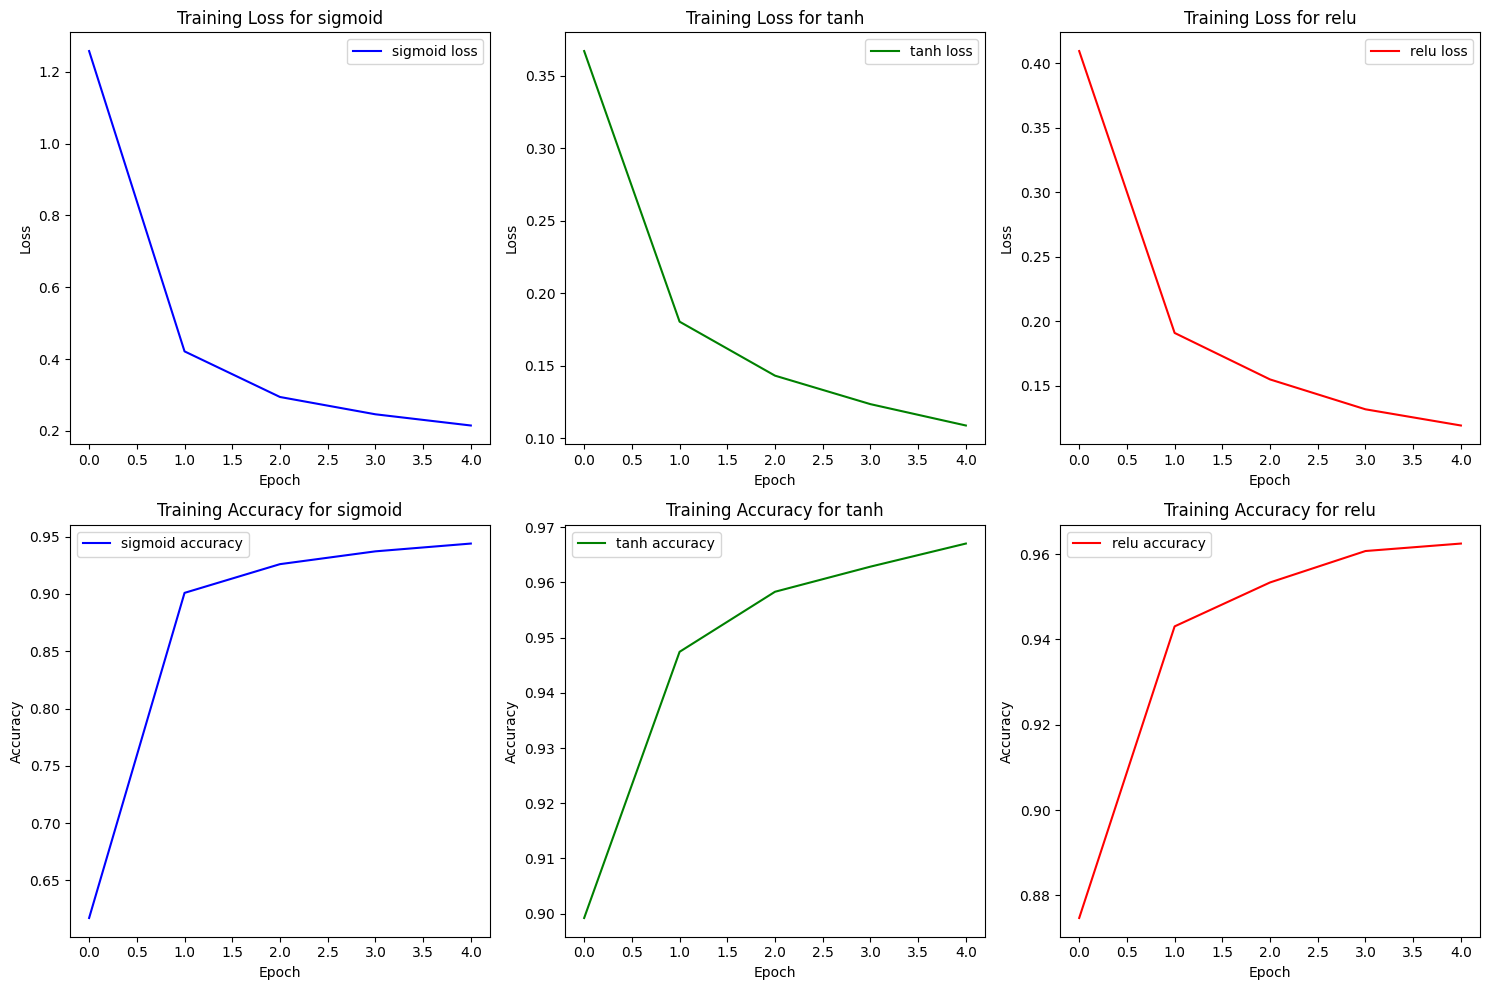

In [43]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()

plt.tight_layout()
plt.show()


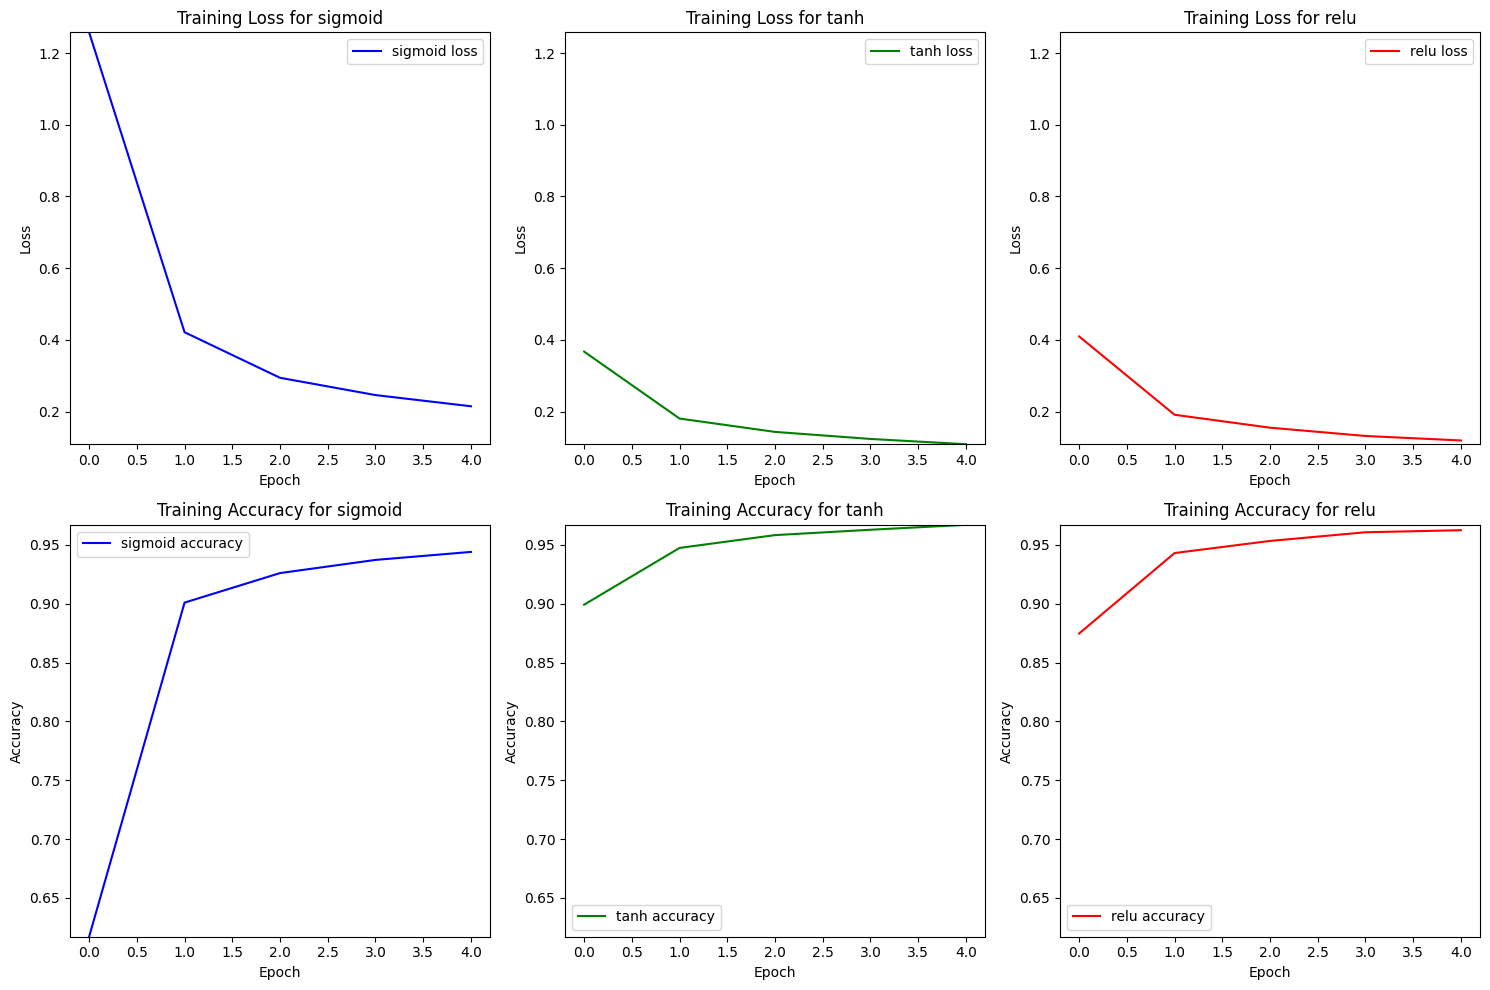

In [44]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

# Calculate the maximum and minimum values for loss and accuracy
max_loss = max(max(history.history['loss']) for history in basic_history_dict.values())
min_loss = min(min(history.history['loss']) for history in basic_history_dict.values())
max_accuracy = max(max(history.history['accuracy']) for history in basic_history_dict.values())
min_accuracy = min(min(history.history['accuracy']) for history in basic_history_dict.values())

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()
    axs[0, i].set_ylim([min_loss, max_loss])  # Set the same y-axis for loss

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()
    axs[1, i].set_ylim([min_accuracy, max_accuracy])  # Set the same y-axis for accuracy

plt.tight_layout()
plt.show()


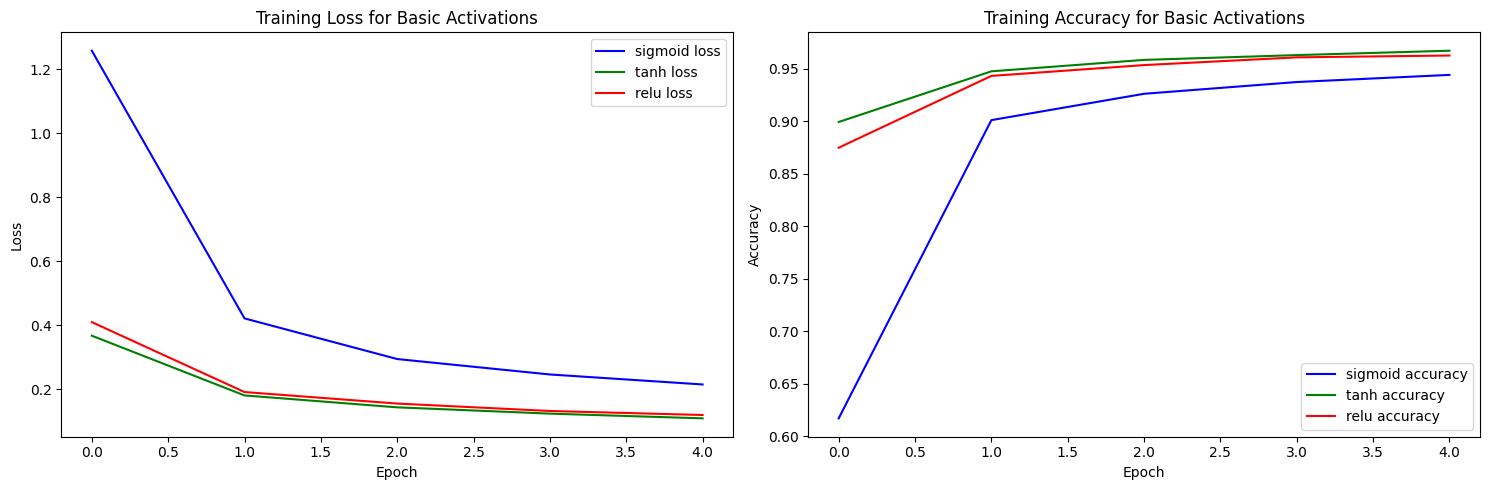

In [45]:
# Define a list of colors for the plots
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, (activation, history) in enumerate(basic_history_dict.items()):
    axs[0].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])

axs[0].set_title('Training Loss for Basic Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for Basic Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


In [46]:
from tensorflow.keras.layers import PReLU

def create_model(activation):
    model = Sequential()
    model.add(Dense(64, input_shape=(784,)))
    model.add(activation)
    model.add(Dense(10, activation='softmax'))
    return model
# Define the advanced activation functions and their names
advanced_activations = [LeakyReLU(), PReLU()]
advanced_activations_names = ['LeakyReLU', 'PReLU']

# Train a model for each advanced activation function and print the test accuracy
advanced_history_dict = {}
for i, activation in enumerate(advanced_activations):
    model = create_model(activation)
    model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=0)
    advanced_history_dict[advanced_activations_names[i]] = history

    # Print out the final training loss and accuracy
    print(f'{advanced_activations_names[i]} Training Loss: {history.history["loss"][-1]}')
    print(f'{advanced_activations_names[i]} Training Accuracy: {history.history["accuracy"][-1]}')

    # Print out the final validation loss and accuracy
    print(f'{advanced_activations_names[i]} Validation Loss: {history.history["val_loss"][-1]}')
    print(f'{advanced_activations_names[i]} Validation Accuracy: {history.history["val_accuracy"][-1]}')

LeakyReLU Training Loss: 0.09934338182210922
LeakyReLU Training Accuracy: 0.9703333377838135
LeakyReLU Validation Loss: 0.10514648258686066
LeakyReLU Validation Accuracy: 0.968500018119812
PReLU Training Loss: 0.06089622154831886
PReLU Training Accuracy: 0.9811833500862122
PReLU Validation Loss: 0.095465749502182
PReLU Validation Accuracy: 0.9703999757766724


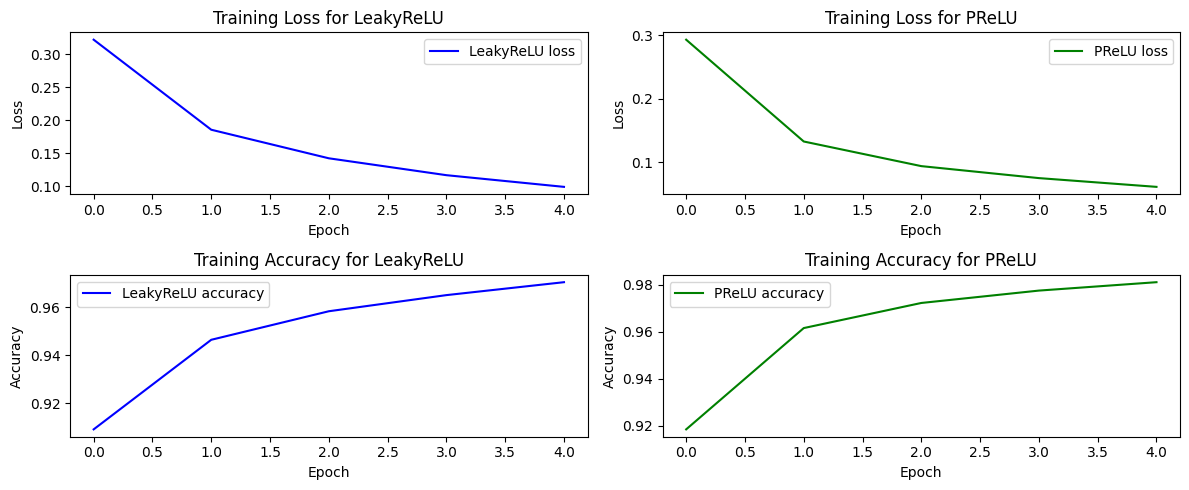

In [47]:
# Define a list of colors for the plots
colors = ['b', 'g']

fig, axs = plt.subplots(2, len(advanced_history_dict), figsize=(12, 5))

for i, (activation, history) in enumerate(advanced_history_dict.items()):
    axs[0, i].plot(history.history['loss'], label=f'{activation} loss', color=colors[i])
    axs[0, i].set_title(f'Training Loss for {activation}')
    axs[0, i].set(xlabel='Epoch', ylabel='Loss')
    axs[0, i].legend()

    axs[1, i].plot(history.history['accuracy'], label=f'{activation} accuracy', color=colors[i])
    axs[1, i].set_title(f'Training Accuracy for {activation}')
    axs[1, i].set(xlabel='Epoch', ylabel='Accuracy')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

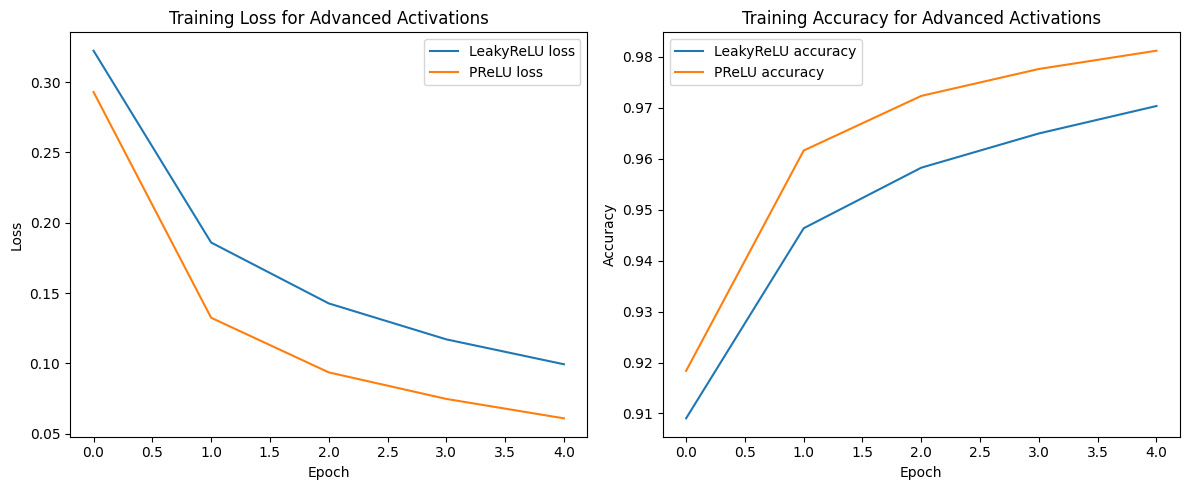

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for activation, history in advanced_history_dict.items():
    axs[0].plot(history.history['loss'], label=f'{activation} loss')
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy')

axs[0].set_title('Training Loss for Advanced Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for Advanced Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

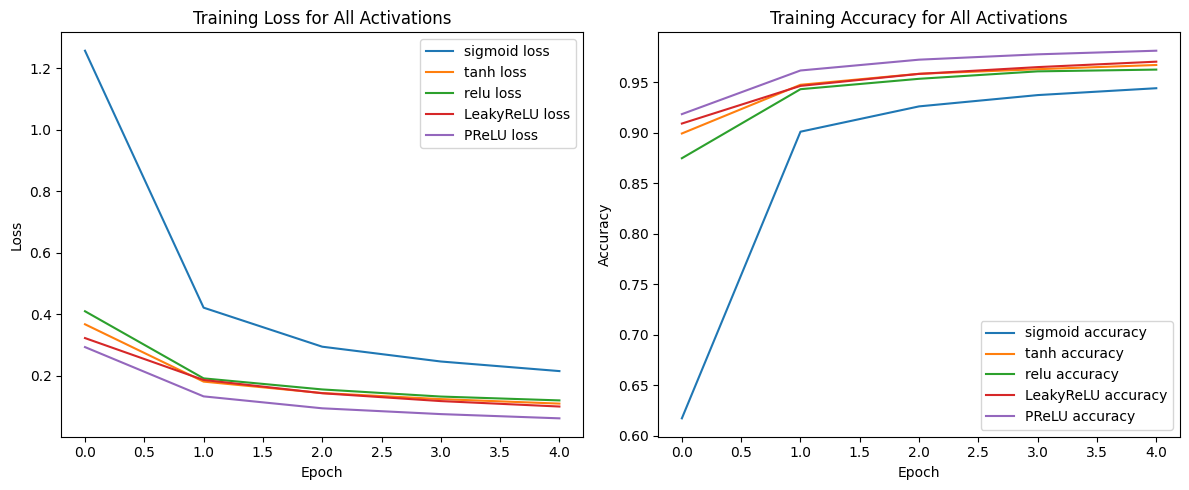

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for activation, history in {**basic_history_dict, **advanced_history_dict}.items():
    axs[0].plot(history.history['loss'], label=f'{activation} loss')
    axs[1].plot(history.history['accuracy'], label=f'{activation} accuracy')

axs[0].set_title('Training Loss for All Activations')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].set_title('Training Accuracy for All Activations')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()
